In [241]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

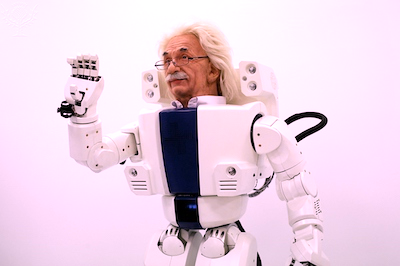

In [242]:
## Question 1

colour_im = np.array(Image.open('images/robot-enstein.jpg'))

for row in colour_im:
    for pixel in row:
        red = pixel[0]*1.2
        blue = pixel[2]*1.15
        
        if red > 255:
            red = 255
        red = int(red)
        
        if blue > 255:
            blue = 255
        blue = int(blue)
        pixel[0] = red
        pixel[2] = blue
  
Image.fromarray(colour_im)

In [243]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [244]:
from tabulate import tabulate

In [245]:
#Question 3a
#data from https://github.com/cmoa/collection

with open('data/cmoa_clean.tsv') as f:
    cmoa_data = np.loadtxt(f, dtype = 'O', skiprows=1, delimiter="\t") 
    cmoa_data[:,3] = cmoa_data[:,3].astype(float)
    cmoa_data[:,4] = cmoa_data[:,4].astype(float)
    cmoa_data = np.array(cmoa_data)

#creating a list of all our different group sizes
list_of_lengths = []
for data in cmoa_data:
    if "|" in data[5]:
        names = data[5].split("|")
        length_of_names = len(names)
        if length_of_names not in list_of_lengths:
            list_of_lengths.append(length_of_names)
print(list_of_lengths)

group_two = 0
group_three = 0
group_four = 0
group_thirteen = 0

group_names = []
for data in cmoa_data:
    if "|" in data[5]:
        group_names.append(data)
        names = data[5].split("|")
        if len(names) == 2:
            group_two +=1
        if len(names) == 3:
            group_three +=1
        if len(names) == 4:
            group_four +=1
        if len(names) == 13:
            group_thirteen +=1

print(group_two)
print(group_three)
print(group_four)
print(group_thirteen)

#printing the length of the grouped names to check my separated groups add up to my total grouped data amount
print(len(group_names))

[2, 3, 4, 13]
2812
246
39
1
3098


In [246]:
#Question 3a continued
#I used this site to assist in tabulating the data: https://www.statology.org/create-table-in-python/
data = [[2, 2812], [3, 246], [4, 39], [13, 1]]

col_names = ["Size of Group", "Number of Artifacts"]

print(tabulate(data, headers=col_names, tablefmt="grid"))

+-----------------+-----------------------+
|   Size of Group |   Number of Artifacts |
+=================+=======================+
|               2 |                  2812 |
+-----------------+-----------------------+
|               3 |                   246 |
+-----------------+-----------------------+
|               4 |                    39 |
+-----------------+-----------------------+
|              13 |                     1 |
+-----------------+-----------------------+


In [248]:
#Question 3b
#data from #https://corgis-edu.github.io/corgis/csv/food/

#used this resource from the numpy catalogue to find a function that would help: 
#https://numpy.org/doc/stable/reference/generated/numpy.isin.html

with open('data/unique_foods.csv') as f:
    food = np.loadtxt(f, dtype = 'O', skiprows=1, delimiter="\t") 
    food = np.array(food)

titles = cmoa_data[:,0]

counter = 0

for title in titles:
    if np.isin(food, title).any() == True:
        counter +=1
        
length_of_collection = len(cmoa_data)

percent_food = (counter/length_of_collection)*100

print("There is: " + str(percent_food) + " percent of food in titles in the museum collection") 

There is: 0.07028230057397211 percent of food in titles in the museum collection
